In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Can we predict the current growth rate based on dates certain measures were taken?

## Data Cleaning

In [2]:
# Note: data downloaded from Yu group Github on 5/7/20
demo = pd.read_csv('data/county_data_abridged.csv')
demo.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0


In [3]:
# Note: data downloaded from CSSE Github on 5/7/20
cases = pd.read_csv('data/time_series_covid19_confirmed_US.csv')
cases.head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,141,141,145,145,145,145,145,145,149,149
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,14,14,14,14,14,14,14,14,15,15
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,1400,1433,1539,1575,1757,1808,1843,1924,1968,2031
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,57,57,66,66,66,66,66,66,66,66
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,40,43,44,42,45,48,53,53,58,61
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,171,174,174,175,181,187,188,189,196,205
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,37,37,39,42,43,45,45,47,47,51
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,42,42,42,42,42,43,42,43,43,44
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,34,36,37,39,40,40,40,40,42,44


In [4]:
demo.shape

(3244, 87)

In [5]:
demo.columns

Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P

In [6]:
demo.iloc[:, :14].isna().sum()

countyFIPS                        0
STATEFP                          23
COUNTYFP                         23
CountyName                        0
StateName                         0
State                           169
lat                             169
lon                             169
POP_LATITUDE                     23
POP_LONGITUDE                    23
CensusRegionName                 98
CensusDivisionName               98
Rural-UrbanContinuumCode2013     24
PopulationEstimate2018           23
dtype: int64

In [7]:
cases.iloc[:, :14].isna().sum()

UID                0
iso2               0
iso3               0
code3              0
FIPS              10
Admin2             7
Province_State     0
Country_Region     0
Lat                0
Long_              0
Combined_Key       0
1/22/20            0
1/23/20            0
1/24/20            0
dtype: int64

In [8]:
cases['FIPS'] = cases['FIPS'].fillna(-1).astype(int)

In [9]:
demo['countyFIPS'].str.isnumeric().value_counts()

True     3242
False       2
Name: countyFIPS, dtype: int64

In [10]:
demo.iloc[-2:]

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
3242,City1,NaN,NaN,New York City,NY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3243,City2,NaN,NaN,Kansas City,MO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# since there appears to be no info for these 2 rows, we will drop them
demo = demo.iloc[:-2]
demo['countyFIPS'].str.isnumeric().value_counts()

True    3242
Name: countyFIPS, dtype: int64

In [12]:
demo['FIPS'] = demo['countyFIPS'].astype(int)

In [13]:
# now we can merge demo data with ts data on FIPS
cases = cases.merge(demo, on = 'FIPS')

## Predicting number of cases

In [14]:
cases['stay at home'].value_counts(dropna = False)

NaN         489
737514.0    360
737508.0    315
737517.0    258
737507.0    245
737518.0    212
737521.0    184
737510.0    177
737509.0    147
737505.0    124
737512.0    114
737511.0    109
737515.0    109
737519.0     66
737506.0     64
737516.0     63
737503.0     58
737522.0     46
Name: stay at home, dtype: int64

In [15]:
# we set null values for stay at home order dates to the current date (that way time elapsed since order will be 0)
#filtered_cases['stay at home'] = filtered_cases['stay at home'].fillna(737551).astype(int).apply(pd.Timestamp.fromordinal)

In [16]:
measures = ['stay at home', '>50 gatherings', 'public schools', 'restaurant dine-in', 
            'entertainment/gym', 'federal guidelines']
for measure in measures:
    cases[measure] = cases[measure].fillna(737551).astype(int).apply(pd.Timestamp.fromordinal)

In [17]:
cur_date = pd.Timestamp('5/6/20')
for measure in measures:
    cases[f'days since {measure}'] = cases[measure].apply(lambda x : (cur_date - x).days)

In [19]:
cases['days since stay at home'].value_counts()

0     489
37    360
43    315
34    258
44    245
33    212
30    184
41    177
42    147
46    124
39    114
40    109
36    109
32     66
45     64
35     63
48     58
29     46
Name: days since stay at home, dtype: int64

In [20]:
def rmse(pred, real):
    return np.sqrt(np.mean(np.square(pred - real)))

In [126]:
X = cases.loc[:, '4/25/20': '5/5/20']
y = cases.loc[:, '5/6/20']

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 99)

In [128]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
rmse(lr.predict(X_test), y_test)

15.664200033979341

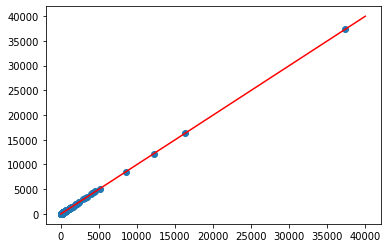

In [130]:
plt.scatter(lr.predict(X_test), y_test)
plt.plot(np.arange(40000), np.arange(40000), color = 'r')

## predict new cases

In [193]:
X = np.array(cases.loc[:, '4/25/20': '5/5/20']) - np.array(cases.loc[:, '4/24/20': '5/4/20'])
y = np.array(cases.loc[:, '5/6/20']) - np.array(cases.loc[:, '5/5/20'])
X.shape, y.shape

((3140, 11), (3140,))

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 99)
lr.fit(X_train, y_train)
rmse(lr.predict(X_test), y_test)

16.900915327071655

In [195]:
from sklearn.ensemble import RandomForestRegressor

In [196]:
rf = RandomForestRegressor()

In [197]:
rf.fit(X_train, y_train)
rmse(rf.predict(X_test), y_test)

13.789763798809181

In [198]:
X = np.hstack((X, np.array(cases['days since stay at home']).reshape(-1, 1)))

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 99)
lr.fit(X_train, y_train)
rmse(lr.predict(X_test), y_test)

16.879137018972585

In [200]:
rf.fit(X_train, y_train)
rmse(rf.predict(X_test), y_test)

13.95988568547937

In [201]:
X = np.hstack((X, np.array(cases[yu_important_vars].fillna(0))))

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 99)
lr.fit(X_train, y_train)
rmse(lr.predict(X_test), y_test)

15.948555656869251

In [205]:
rf.fit(X_train, y_train)
rmse(rf.predict(X_test), y_test)

13.375846874790186